In [1]:
# load the baseline results
# read in baseline data
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/baseline_runs/clip_hba_behavior_seed1/training_results/training_res_seed1.csv')

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")
    
print(baseline_df.head())

Baseline data loaded: 118 epochs
   epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0      1  143.198375  114.267337            0.455443            7.497325e-59
1      2   99.003030   91.310430            0.422459            4.797240e-50
2      3   88.155927   84.871568            0.421268            9.572966e-50
3      4   82.863315   80.375895            0.425018            1.076738e-50
4      5   78.583811   76.447118            0.440511            9.591843e-55


In [2]:
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

print(baseline_df)

    epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0       1  143.198375  114.267337            0.455443            7.497325e-59
1       2   99.003030   91.310430            0.422459            4.797240e-50
2       3   88.155927   84.871568            0.421268            9.572966e-50
3       4   82.863315   80.375895            0.425018            1.076738e-50
4       5   78.583811   76.447118            0.440511            9.591843e-55
..    ...         ...         ...                 ...                     ...
93     94   17.675313   29.133197            0.755533           4.658267e-209
94     95   17.545072   29.212518            0.759054           4.063549e-212
95     96   17.450050   29.148153            0.755926           2.132139e-209
96     97   17.317206   29.184973            0.757532           8.660125e-211
97     98   17.214430   29.101309            0.755587           4.177484e-209

[98 rows x 5 columns]


In [3]:
# get all of the training run results from the perturbation length experiments

# path to base directory of the perturbation length experiments
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/perturb_length_experiments_baselineseed1_perturbseed0')

# list all training run directories in the results_dir
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir()
                  and d.name.startswith('random_target')])

for run_dir in run_dirs:
    print(run_dir.name)

random_target_e10_l10
random_target_e10_l2
random_target_e10_l20
random_target_e10_l30
random_target_e10_l40
random_target_e10_l5
random_target_e10_l50
random_target_e13_l10
random_target_e13_l20
random_target_e13_l30
random_target_e13_l40
random_target_e13_l5
random_target_e13_l50
random_target_e16_l10
random_target_e16_l20
random_target_e16_l30
random_target_e16_l40
random_target_e16_l5
random_target_e16_l50
random_target_e19_l10
random_target_e19_l20
random_target_e19_l30
random_target_e19_l40
random_target_e19_l5
random_target_e19_l50
random_target_e1_l10
random_target_e1_l2
random_target_e1_l20
random_target_e1_l30
random_target_e1_l40
random_target_e1_l5
random_target_e1_l50
random_target_e20_l10
random_target_e20_l2
random_target_e20_l20
random_target_e20_l30
random_target_e20_l40
random_target_e20_l5
random_target_e20_l50
random_target_e22_l5
random_target_e2_l10
random_target_e2_l2
random_target_e2_l20
random_target_e2_l30
random_target_e2_l40
random_target_e2_l5
random_target

In [4]:
# in every run_dir, find the folder called either metrics.csv or training_res.csv
# and read it in as a pandas dataframe

#all_perturb_length_dfs should be a dict mapping run names (strings) to DataFrames, or a list of DataFrames, where each DataFrame has a 'test_loss' column and its indices represent epochs. 

all_perturb_length_dfs = {}

for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

Found results csv in random_target_e10_l10
Found results csv in random_target_e10_l2
Found results csv in random_target_e10_l20
Found results csv in random_target_e10_l30
Found results csv in random_target_e10_l40
Found results csv in random_target_e10_l5
Found results csv in random_target_e10_l50
Found results csv in random_target_e13_l10
Found results csv in random_target_e13_l20
Found results csv in random_target_e13_l30
Found results csv in random_target_e13_l40
Found results csv in random_target_e13_l5
Found results csv in random_target_e13_l50
Found results csv in random_target_e16_l10
Found results csv in random_target_e16_l20
Found results csv in random_target_e16_l30
Found results csv in random_target_e16_l40
Found results csv in random_target_e16_l5
Found results csv in random_target_e16_l50
Found results csv in random_target_e19_l10
Found results csv in random_target_e19_l20
Found results csv in random_target_e19_l30
Found results csv in random_target_e19_l40
Found results c

In [5]:
print(all_perturb_length_dfs)

{'random_target_e10_l10':      epoch  train_loss  test_loss  behavioral_rsa_rho  behavioral_rsa_p_value  \
0       10  116.037356  83.877477            0.627783           1.161130e-124   
1       11  108.866402  87.170436            0.620361           6.029206e-121   
2       12  106.712804  90.209957            0.620820           3.575812e-121   
3       13  105.615242  92.952512            0.619597           1.434417e-120   
4       14  104.945687  95.128610            0.619060           2.637457e-120   
..     ...         ...        ...                 ...                     ...   
104    114   14.820902  29.497532            0.730804           5.946660e-189   
105    115   14.732647  29.561627            0.734103           1.669248e-191   
106    116   14.660842  29.512901            0.734373           1.028537e-191   
107    117   14.560640  29.578890            0.734255           1.272555e-191   
108    118   14.474779  29.601395            0.732563           2.619055e-190   

 

In [6]:

# combine this with the baseline df, merging on the epoch column, then select 'epoch', and any columns containing 'test_loss' in their names
special_df = pd.merge(baseline_df, all_perturb_length_dfs['random_target_e1_l10'], on='epoch', how='outer')[['epoch', 'test_loss_x', 'test_loss_y']]

print(special_df.to_string())


     epoch  test_loss_x  test_loss_y
0        1   114.267337   119.604526
1        2    91.310430    96.775429
2        3    84.871568    94.975433
3        4    80.375895    94.335770
4        5    76.447118    93.972163
5        6    73.568759    94.914375
6        7    71.198615    97.326795
7        8    68.586059    98.607863
8        9    65.068034    99.358473
9       10    60.307024    99.739522
10      11    56.113487    88.394170
11      12    52.844717    80.833261
12      13    50.444933    76.297111
13      14    48.648318    70.509161
14      15    47.024271    61.654141
15      16    45.653933    52.840882
16      17    44.318907    48.203231
17      18    43.059134    45.092564
18      19    42.113390    43.049189
19      20    41.175045    41.457544
20      21    40.246910    40.045311
21      22    39.534341    39.082488
22      23    38.785147    38.157802
23      24    38.125127    37.309418
24      25    37.566435    36.695788
25      26    36.954318    36.103118
2

In [7]:
# filter out the rows that were from before early stopping kicked in (but after the minimum test loss was achieved)

all_perturb_length_data = {}

for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue

    # Find the epoch with minimum test loss
    min_test_loss_idx = df['test_loss'].idxmin()

    # Keep all rows up to and including the minimum test loss epoch
    filtered_df = df.loc[:min_test_loss_idx].copy()

    all_perturb_length_data[run_name] = filtered_df

    # Print info about the filtering
    original_epochs = len(df)
    filtered_epochs = len(filtered_df)
    removed_epochs = original_epochs - filtered_epochs
    print(f"{run_name}: {original_epochs} -> {filtered_epochs} epochs "
            f"(removed {removed_epochs} epochs after minimum test loss)")

random_target_e10_l10: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l2: 95 -> 75 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l20: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l30: 119 -> 99 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l40: 127 -> 107 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l5: 97 -> 77 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l50: 136 -> 116 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l10: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l20: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l30: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l40: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l5: 106 -> 86 epochs (removed 20 epochs after minimum test

In [8]:

# First, let's examine the actual run names to understand the format
print("Actual run names:")
for run_name, df in all_perturb_length_dfs.items():
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for run_name, df in all_perturb_length_dfs.items():
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")


Actual run names:
  random_target_e10_l10
  random_target_e10_l2
  random_target_e10_l20
  random_target_e10_l30
  random_target_e10_l40
  random_target_e10_l5
  random_target_e10_l50
  random_target_e13_l10
  random_target_e13_l20
  random_target_e13_l30
  random_target_e13_l40
  random_target_e13_l5
  random_target_e13_l50
  random_target_e16_l10
  random_target_e16_l20
  random_target_e16_l30
  random_target_e16_l40
  random_target_e16_l5
  random_target_e16_l50
  random_target_e19_l10
  random_target_e19_l20
  random_target_e19_l30
  random_target_e19_l40
  random_target_e19_l5
  random_target_e19_l50
  random_target_e1_l10
  random_target_e1_l2
  random_target_e1_l20
  random_target_e1_l30
  random_target_e1_l40
  random_target_e1_l5
  random_target_e1_l50
  random_target_e20_l10
  random_target_e20_l2
  random_target_e20_l20
  random_target_e20_l30
  random_target_e20_l40
  random_target_e20_l5
  random_target_e20_l50
  random_target_e22_l5
  random_target_e2_l10
  random_target_

In [9]:
# Calculate recovery times for test loss within 1% of baseline after perturbations finish
recovery_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Calculate when perturbation ends
    perturbation_end = start_epoch + length - 1
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    
    # Find the first epoch AFTER perturbation ends where test_loss is within 1% of baseline
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        # Only check epochs after perturbation has ended
        if current_epoch <= perturbation_end:
            continue
        # Get baseline loss at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        if len(baseline_at_same_epoch) > 0:
            baseline_loss = baseline_at_same_epoch.iloc[0]['test_loss']
            target_loss = baseline_loss * 1.01  # Within 1% of baseline at same epoch
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
        else:
            # compare to the minimum test loss epoch
            baseline_loss = baseline_df['test_loss'].min()
            target_loss = baseline_loss * 1.01
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
        
    if recovery_epoch is not None:
        epochs_to_recovery = recovery_epoch - perturbation_end
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': recovery_epoch,
            'epochs_to_recovery': epochs_to_recovery,
            'label': f'E{start_epoch}_L{length}',
            'recovered': True
        })
    else:
        #max_epoch_in_run = df_sorted['epoch'].max()
        #epochs_after_perturbation = max_epoch_in_run - perturbation_end
        epochs_to_recovery = None
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None,
            'label': f'E{start_epoch}_L{length}',
            'recovered': False
        })

# Convert to DataFrame for easier manipulation
recovery_df = pd.DataFrame(recovery_data)

# Sort by start_epoch, then by length for better visualization
recovery_df = recovery_df.sort_values(['start_epoch', 'length'])

print(recovery_df)


                  run_name  start_epoch  length  perturbation_end  \
26     random_target_e1_l2            1       2                 2   
30     random_target_e1_l5            1       5                 5   
25    random_target_e1_l10            1      10                10   
27    random_target_e1_l20            1      20                20   
28    random_target_e1_l30            1      30                30   
..                     ...          ...     ...               ...   
130  random_target_e94_l10           94      10               103   
131  random_target_e94_l20           94      20               113   
132  random_target_e94_l30           94      30               123   
133  random_target_e94_l40           94      40               133   
135  random_target_e94_l50           94      50               143   

     recovery_epoch  epochs_to_recovery    label  recovered  
26             43.0                41.0    E1_L2       True  
30             58.0                53.0    E1_L

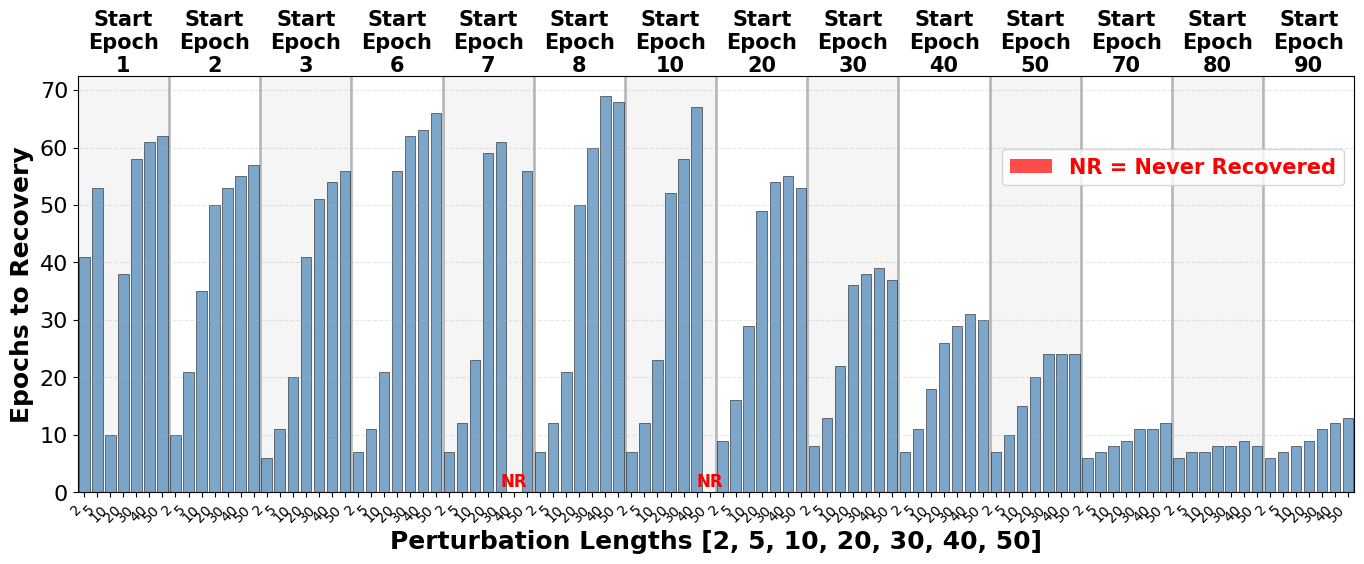


Recovery time statistics (epochs to within 1% of baseline after perturbation ends):
  Total runs analyzed: 136
  Runs that recovered: 130
  Runs that never recovered: 6
  Mean recovery time (recovered runs): 27.9 epochs
  Standard deviation: 20.8 epochs
  Minimum recovery time: 6 epochs
  Maximum recovery time (recovered): 71 epochs

Never recovered runs:
  E7_L40: nan epochs after perturbation (still not recovered)
  E10_L50: nan epochs after perturbation (still not recovered)
  E13_L30: nan epochs after perturbation (still not recovered)
  E13_L40: nan epochs after perturbation (still not recovered)
  E13_L50: nan epochs after perturbation (still not recovered)
  E16_L50: nan epochs after perturbation (still not recovered)


In [10]:

# Separate recovered and never-recovered runs
recovered_runs = recovery_df[recovery_df['recovered'] == True].copy()
never_recovered_runs = recovery_df[recovery_df['recovered'] == False].copy()

import matplotlib as mpl
from matplotlib.patches import Patch

# Exclude any rows you want to exclude
recovery_df = recovery_df[recovery_df['start_epoch'] != 13]
recovery_df = recovery_df[recovery_df['start_epoch'] != 16]
recovery_df = recovery_df[recovery_df['start_epoch'] != 19]
recovery_df = recovery_df[recovery_df['start_epoch'] != 22]
recovery_df = recovery_df[recovery_df['start_epoch'] != 60]
recovery_df = recovery_df[recovery_df['start_epoch'] != 58]
recovery_df = recovery_df[recovery_df['start_epoch'] != 94]

# Set width statically to 10 inches
plt.figure(figsize=(14, 6))

# Group by start_epoch for section delineation
x_positions = []
y_values = []
colors = []
x_labels = []
section_boundaries = []
section_centers = []
section_label_map = {}
curr_x = 0
recovery_rows = []

unique_epochs = sorted(recovery_df['start_epoch'].unique())

# Build plot arrays and calculate boundaries
for start_epoch in unique_epochs:
    section_data = recovery_df[recovery_df['start_epoch'] == start_epoch]
    section_start = curr_x  # inclusive bar
    for _, row in section_data.iterrows():
        x_positions.append(curr_x)
        # For never-recovered runs, set y to 0 so the bar is invisible
        if row['recovered']:
            y_values.append(row['epochs_to_recovery'])
        else:
            y_values.append(0)
        colors.append('steelblue' if row['recovered'] else 'red')
        x_labels.append(f"{row['length']}")
        recovery_rows.append(row)
        curr_x += 1
    section_end = curr_x - 1  # inclusive bar
    section_boundaries.append((section_start - 0.5, section_end + 0.5))
    section_centers.append((section_start + section_end) / 2)
    section_label_map[start_epoch] = (section_start, section_end)

bars = plt.bar(x_positions, y_values, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)

# Add "NR" annotation *at the bar position* for not recovered
for i, row in enumerate(recovery_rows):
    if not row['recovered']:
        # Place the "NR" right above zero, or slightly above the bar bottom
        plt.text(x_positions[i], 0.3, 'NR', ha='center', va='bottom', 
                 fontsize=12, fontweight='bold', color='red', zorder=10, clip_on=False)

plt.xlabel('Perturbation Lengths [2, 5, 10, 20, 30, 40, 50]', fontsize=18, fontweight='bold')
plt.ylabel('Epochs to Recovery', fontsize=18, fontweight='bold')

# Make y-axis tick labels larger
plt.yticks(fontsize=16)

# Section annotation: add a "Start Epoch {start_epoch}" label above each group only at the group's x center, but below the top border
ymax = plt.ylim()[1]
# Place label a fixed distance below the top
offset = 0 * ymax  # You can adjust this if desired (e.g. 0.02 or 0.05)
label_y = ymax - offset
for center, start_epoch in zip(section_centers, unique_epochs):
    plt.text(center, label_y, f"Start\nEpoch\n{start_epoch}", ha='center', va='bottom',
             fontsize=15, fontweight='bold', color='black', clip_on=False)

plt.ylim(top=ymax)  # Set top limit to origin ymax (no margin needed for label)

# Draw vertical lines between different start_epoch sections (except after the last)
for i in range(1, len(section_centers)):
    right = section_boundaries[i][0]  # position between bars
    plt.axvline(right, color='gray', linestyle='-', lw=2, alpha=0.5, zorder=0)

# Add background shading for every other section
for i, (section_start, section_end) in enumerate(section_boundaries):
    if i % 2 == 0:
        plt.axvspan(section_start, section_end, color='gray', alpha=0.08, zorder=0)

plt.xticks(x_positions, x_labels, rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Remove x-axis padding to left and right
if x_positions:
    plt.xlim(left=min(x_positions) - 0.5, right=max(x_positions) + 0.5)

# Create legend with red, bold text
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='NR = Never Recovered')
]
plt.legend(
    handles=legend_elements,
    fontsize=13,
    loc='upper right',
    bbox_to_anchor=(1, 0.85),
    labelcolor='red',
    prop={'weight': 'bold',
          'size': 15}
)

plt.tight_layout(pad=2)
plt.show()

# Print summary statistics
print(f"\nRecovery time statistics (epochs to within 1% of baseline after perturbation ends):")
print(f"  Total runs analyzed: {len(recovery_data)}")
print(f"  Runs that recovered: {len(recovered_runs)}")
print(f"  Runs that never recovered: {len(never_recovered_runs)}")
if len(recovered_runs) > 0:
    mean_recovery = recovered_runs['epochs_to_recovery'].mean()
    std_recovery = recovered_runs['epochs_to_recovery'].std()
    min_recovery = recovered_runs['epochs_to_recovery'].min()
    max_recovery = recovered_runs['epochs_to_recovery'].max()
    print(f"  Mean recovery time (recovered runs): {mean_recovery:.1f} epochs")
    print(f"  Standard deviation: {std_recovery:.1f} epochs")
    print(f"  Minimum recovery time: {min_recovery:.0f} epochs")
    print(f"  Maximum recovery time (recovered): {max_recovery:.0f} epochs")
    
print(f"\nNever recovered runs:")
for _, row in never_recovered_runs.iterrows():
    print(f"  {row['label']}: {row['epochs_to_recovery']:.0f} epochs after perturbation (still not recovered)")